In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/dataset_accident.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
df = pd.read_csv("/content/dataset_accident.csv")

In [4]:
count_unique_Accident_severity = df['Accident_severity'].value_counts()
count_unique_Accident_severity

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


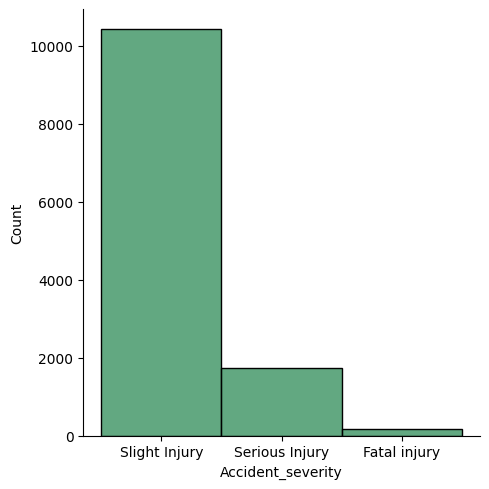

In [5]:
sns.displot(df, x= 'Accident_severity', color = 'seagreen')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df = df.fillna(df.mode().iloc[0])

In [8]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

In [9]:
df.drop(columns=['Time'], inplace=True)

In [10]:
count_unique_Age_band_of_driver= df['Age_band_of_driver'].value_counts()

In [11]:
count_unique_Age_band_of_driver

,count
Age_band_of_driver,
18-30,4271
31-50,4087
Over 51,1585
Unknown,1548
Under 18,825


In [12]:
df = df[df['Age_band_of_casualty'] != 5]

In [13]:
mapping1 = {
    'Unknown' : 0,
    'Under 18' : 1,
    '18-30': 2,
    '31-50': 3,
    'Over 51': 4
}

df['Age_band_of_driver'] = df['Age_band_of_driver'].replace(mapping1)

In [14]:
hour_column = df.pop('Hour')
df.insert(0, 'Hour', hour_column)

In [15]:
count_unique_Accident_severity= df['Accident_severity'].value_counts()
count_unique_Accident_severity

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


In [16]:
mapping = {
    'Slight Injury': 0,
    'Serious Injury': 1,
    'Fatal injury': 2
}

df['Accident_severity'] = df['Accident_severity'].replace(mapping)

In [17]:
count_unique_Educational_level= df['Educational_level'].value_counts()
count_unique_Educational_level

,count
Educational_level,
Junior high school,8360
Elementary school,2163
High school,1110
Above high school,362
Writing & reading,176
Unknown,100
Illiterate,45


In [18]:
mapping2 = {
    'Unknown' : 0,
    'Illiterate' : 1,
    'Writing & reading': 2,
    'Elementary school': 3,
    'High school': 4,
    'Junior high school' : 5,
    'Above high school' : 6,
}

df['Educational_level'] = df['Educational_level'].replace(mapping2)

In [19]:
count_unique_Driving_experience= df['Driving_experience'].value_counts()
count_unique_Driving_experience

,count
Driving_experience,
5-10yr,4192
2-5yr,2613
Above 10yr,2262
1-2yr,1756
Below 1yr,1342
No Licence,118
unknown,33


In [20]:
mapping3 = {
    'unknown' : 0,
    'No Licence' : 1,
    'Below 1yr': 2,
    '1-2yr': 3,
    '2-5yr': 4,
    '5-10yr' : 5,
    'Above 10yr' : 6,
}
df['Driving_experience'] = df['Driving_experience'].replace(mapping3)

In [21]:
count_unique_Age_band_of_casualty= df['Age_band_of_casualty'].value_counts()
count_unique_Age_band_of_casualty

,count
Age_band_of_casualty,
na,4443
18-30,3145
31-50,2455
Under 18,1035
Over 51,994
5,244


In [22]:
df = df[df['Age_band_of_casualty'] != '5']

In [23]:
mapping4 = {
    'na' : 0,
    'Under 18' : 1,
    '18-30': 2,
    '31-50': 3,
    'Over 51': 4,
}
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace(mapping4)

In [24]:
count_unique_Service_year_of_vehicle= df['Service_year_of_vehicle'].value_counts()
count_unique_Service_year_of_vehicle

,count
Service_year_of_vehicle,
Unknown,6682
2-5yrs,1758
Above 10yr,1295
5-10yrs,1248
1-2yr,814
Below 1yr,275


In [25]:
mapping5 = {
    'Unknown' : 0,
    'Below 1yr': 1,
    '1-2yr': 2,
    '2-5yrs': 3,
    '5-10yrs' : 4,
    'Above 10yr' : 5,
}
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace(mapping5)

In [26]:
df

,Hour,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,2,Male,6,Employee,3,Automobile,Owner,5,...,Going straight,na,na,0,na,Driver,Normal,Not a Pedestrian,Moving Backward,0
1,17,Monday,3,Male,5,Employee,6,Public (> 45 seats),Owner,4,...,Going straight,na,na,0,na,Driver,Normal,Not a Pedestrian,Overtaking,0
2,17,Monday,2,Male,5,Employee,3,Lorry (41?100Q),Owner,0,...,Going straight,Driver or rider,Male,3,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,1
3,1,Sunday,2,Male,5,Employee,5,Public (> 45 seats),Governmental,0,...,Going straight,Pedestrian,Female,2,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,0
4,1,Sunday,2,Male,5,Employee,4,Automobile,Owner,4,...,Going straight,na,na,0,na,Driver,Normal,Not a Pedestrian,Overtaking,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,9,Friday,2,Male,5,Employee,5,Special vehicle,Owner,5,...,Reversing,Passenger,Male,4,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,1
12311,16,Wednesday,3,Male,5,Employee,4,Lorry (11?40Q),Owner,0,...,Going straight,na,na,0,na,Driver,Normal,Not a Pedestrian,No distancing,0
12312,18,Sunday,0,Male,3,Employee,5,Automobile,Owner,0,...,Other,na,na,0,na,Driver,Normal,Not a Pedestrian,No distancing,0
12313,13,Sunday,4,Male,5,Employee,5,Bajaj,Owner,3,...,Other,Driver or rider,Male,3,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,1


In [27]:
X = df.drop(columns=['Accident_severity'])  # Assuming 'Accident_severity' is the target column
y = df['Accident_severity']

In [28]:
df_dummies_1 = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)

df_dummies_1 = df_dummies_1.astype(int)

In [29]:
X_1 = df_dummies_1.drop(columns=['Accident_severity'])  # Assuming 'Accident_severity' is the target column
y_1 = df_dummies_1['Accident_severity']

In [30]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
 X_1, y_1, test_size=0.3, random_state = 8)

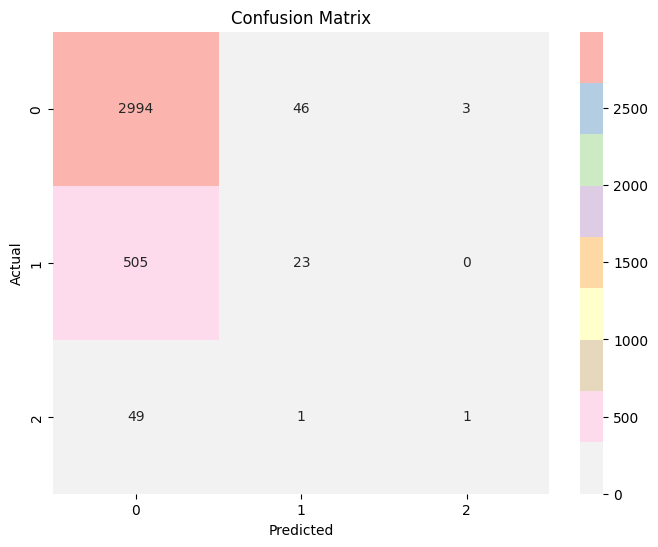

In [31]:
knn = KNeighborsClassifier(5)
knn_1 = knn.fit (X_train_1, y_train_1)
y_pred_1 = knn.predict(X_test_1)
conf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap="Pastel1_r")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(classification_report(y_test_1, y_pred_1, target_names=["0","1","2"]))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3043
           1       0.33      0.04      0.08       528
           2       0.25      0.02      0.04        51

    accuracy                           0.83      3622
   macro avg       0.47      0.35      0.34      3622
weighted avg       0.76      0.83      0.78      3622



In [33]:
svm = SVC()
svm.fit(X_train_1, y_train_1)


predictions_1 = svm.predict(X_test_1)
accuracy_1 = accuracy_score(y_test_1, predictions_1)
print(f"Accuracy: {accuracy_1:.2f}")
print(classification_report(y_test_1, predictions_1))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3043
           1       0.00      0.00      0.00       528
           2       0.00      0.00      0.00        51

    accuracy                           0.84      3622
   macro avg       0.28      0.33      0.30      3622
weighted avg       0.71      0.84      0.77      3622



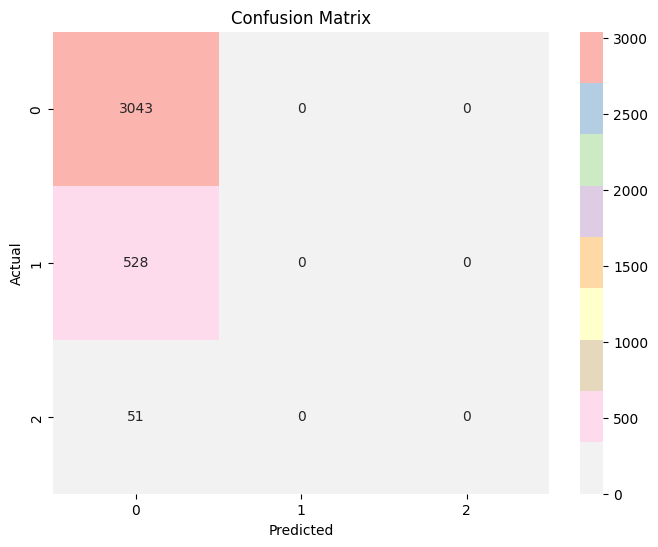

In [34]:
conf_matrix_1 = confusion_matrix(y_test_1, predictions_1)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap="Pastel1_r")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train_1, y_train_1)
from sklearn.metrics import accuracy_score

y_pred_2 = model.predict(X_test_1)

print(accuracy_score(y_test_1, y_pred_2))

0.7379900607399227


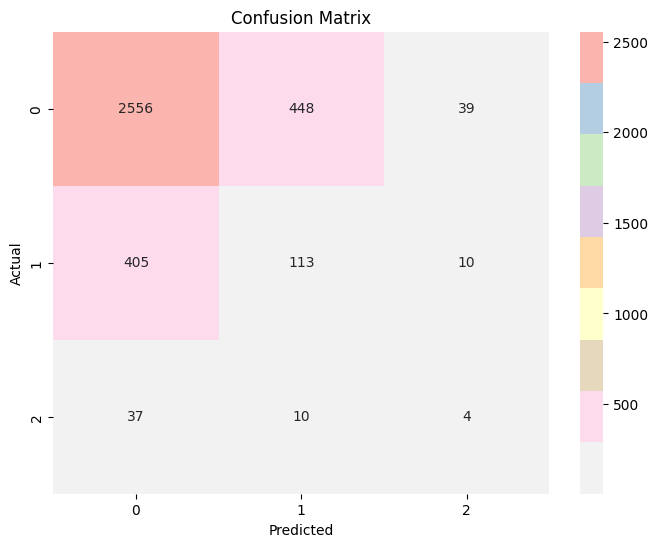

In [36]:
conf_matrix_2 = confusion_matrix(y_test_1, y_pred_2)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap="Pastel1_r")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
accuracy_2 = accuracy_score(y_test_1, y_pred_2)
print(f"Accuracy: {accuracy_2:.2f}")
print(classification_report(y_test_1, y_pred_2))

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3043
           1       0.20      0.21      0.21       528
           2       0.08      0.08      0.08        51

    accuracy                           0.74      3622
   macro avg       0.38      0.38      0.38      3622
weighted avg       0.75      0.74      0.74      3622



In [38]:
import os
for dirname, _, filenames in os.walk('/content/dataset_accident.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
import shap
from PIL import Image
import PIL

%matplotlib inline
import os
for dirname, _, filenames in os.walk('/content/dataset_accident.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [40]:
!pip install dabl

In [41]:
import dabl

In [42]:
df = pd.read_csv("/content/dataset_accident.csv")
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [43]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

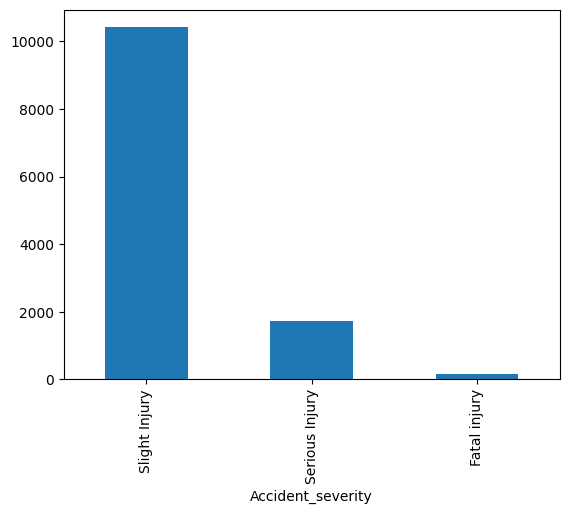

In [44]:
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

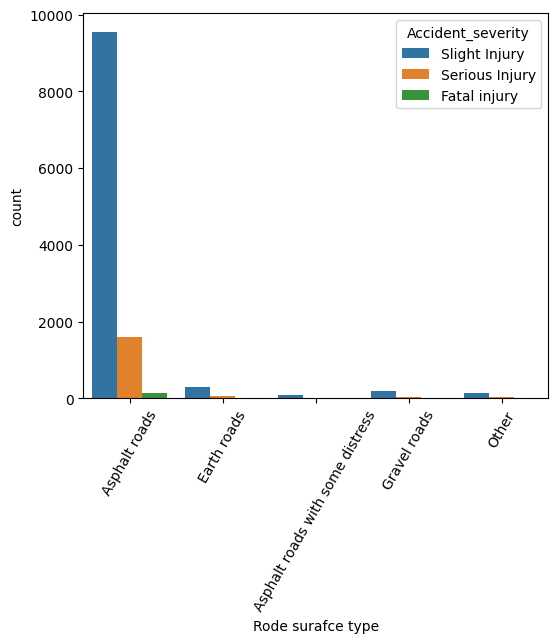

In [45]:
print(df['Road_surface_type'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

In [46]:
pivot_df = pd.pivot_table(data=df,
               index='Road_surface_conditions',
               columns='Accident_severity',
               aggfunc='count')

fatal_df = pivot_df['Road_surface_type']
fatal_df.fillna(0, inplace=True)
fatal_df['sum_of_injuries'] = fatal_df['Fatal injury'] + fatal_df['Serious Injury'] + fatal_df['Slight Injury']
fatal_df

Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum_of_injuries
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


In [47]:
fatal_df_dry = (fatal_df.loc['Dry']/fatal_df.loc['Dry','sum_of_injuries'])*100
fatal_df_dry

,Dry
Accident_severity,
Fatal injury,1.314217
Serious Injury,14.250027
Slight Injury,84.435755
sum_of_injuries,100.000000


In [48]:
fatal_df_snow = (fatal_df.loc['Wet or damp']/fatal_df.loc['Wet or damp','sum_of_injuries'])*100
fatal_df_snow

,Wet or damp
Accident_severity,
Fatal injury,1.256106
Serious Injury,14.096301
Slight Injury,84.647592
sum_of_injuries,100.000000


In [49]:
df.groupby('Road_surface_conditions')['Accident_severity'].count()

,Accident_severity
Road_surface_conditions,
Dry,9340
Flood over 3cm. deep,2
Snow,70
Wet or damp,2904


In [50]:
df['Time'] = pd.to_datetime(df['Time'])

In [51]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols2 = [col for col in obj_cols if col != 'Accident_severity']
obj_cols2

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

In [52]:
# remove time column from datafram
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


<Figure size 500x500 with 0 Axes>

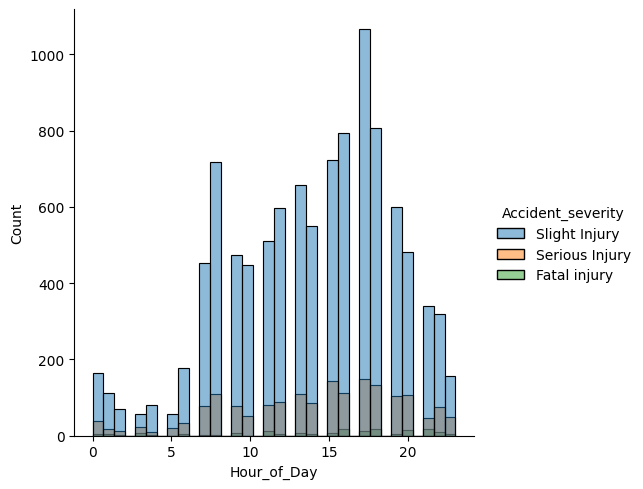

In [53]:
# disribution of hour of the day
plt.figure(figsize=(5,5))
sns.displot(x='Hour_of_Day', hue='Accident_severity', data=n_df)
plt.show()

In [54]:
# feature selection based on visualization (to_be_continue)
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

In [55]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [56]:
# meta data of the new sub dataset
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [57]:
feature_df = featureset_df.copy()

In [58]:
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

In [59]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

In [60]:
X = feature_df[features]
y = target

In [61]:
# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [62]:
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [63]:
## mutual info classif to check informative features
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [64]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

,Columns,MI_score
1,Number_of_casualties,0.013635
0,Number_of_vehicles_involved,0.013190
2,Hour_of_Day,0.006590
46,Type_of_vehicle_Long lorry,0.006190
28,Types_of_Junction_Y Shape,0.005586
69,Service_year_of_vehicle_Below 1yr,0.005561
11,Area_accident_occured_ Hospital areas,0.005284
61,Driving_experience_5-10yr,0.005239
26,Types_of_Junction_Unknown,0.004723
104,Cause_of_accident_Turnover,0.004536


In [65]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new.shape
cols = fs.get_feature_names_out()

In [66]:
fs_df = pd.DataFrame(X_new, columns=cols)

In [67]:
pca = PCA(n_components=3)
pca.fit(encoded_df)

X_pca = pca.transform(encoded_df)

# 3 components PCA algorithm
components = pca.components_

In [68]:
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3'])
pca_df.var()

,0
PC1,27.074680
PC2,1.054314
PC3,0.630354


In [69]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [70]:
!pip show tensorflow keras
!pip install tensorflow keras --upgrade



Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras
---
Name: keras
Version: 3.9.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [77]:
from imblearn.over_sampling import SMOTENC
import numpy as np

# Use list, not np.array, for categorical features
n_cat_index = list(range(3, 50))

# Remove 'n_jobs' — it's not a valid parameter for SMOTENC
smote = SMOTENC(categorical_features=n_cat_index, random_state=42)

# Fit and resample
X_n, y_n = smote.fit_resample(fs_df, y_en)

X_n.shape, y_n.shape


((31245, 50), (31245,))

In [78]:
x_train,x_test,y_train,y_test = train_test_split(X_n, y_n, test_size=0.3, random_state=3,stratify=y_n)


In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import pandas as pd

pd.set_option('display.max_columns', None)

In [80]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [81]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
# One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 3)

x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
# One Hot Encoding
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [82]:
n_timesteps, n_features, n_outputs = x_train.shape[1],x_train.shape[2],y_test.shape[1]

In [83]:
n_timesteps

50

In [84]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM, Dense, Flatten, Add, Activation
n_outputs = 3  # Number of output classes

# Define the input layer
input_layer = Input(shape=(n_timesteps, 1))

# First convolutional block
conv1 = Conv1D(filters=64, kernel_size=2,activation='relu')(input_layer)
# conv1 = BatchNormalization()(conv1)
print('first conv1 layer : ',conv1.shape)
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(conv1)

print('second conv2 layer : ',conv2.shape)

pool1 = MaxPooling1D(pool_size=2)(conv2)
# drop1 = Dropout(0.5)(pool1)
# print('drop1 : ',drop1.shape)


# # First LSTM block
lstm1 = LSTM(64,return_sequences=True)(pool1)
# drop2 = Dropout(0.5)(lstm1)
# print('First LSTM layer : ',lstm1.shape)


# # Second LSTM block with a skip connection
lstm2 = LSTM(64, return_sequences=True)(pool1)  #Skip connection to the first LSTM block
# print('Second LSTM layer : ',lstm2.shape)

combined_lstm = Add()([lstm1, lstm2])
# combined_lstm = BatchNormalization()(combined_lstm)

# drop3 = Dropout(0.5)(combined_lstm)
# print('Combined LSTM layer : ',drop3.shape)

# lstm3 = LSTM(32, return_sequences=True)(combined_lstm)
# print('Second LSTM layer : ',lstm2.shape)


# Dense layers
dense1 = Dense(100, activation='relu')(combined_lstm)
flatten1 = Flatten()(dense1)
output_layer = Dense(n_outputs, activation='softmax')(flatten1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

first conv1 layer :  (None, 49, 64)
second conv2 layer :  (None, 48, 64)


In [85]:
# # Assuming n_timesteps and n_features are defined
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM, Dense, Flatten, Add, Activation
# n_outputs = 3  # Number of output classes

# # Define the input layer
# input_layer = Input(shape=(n_timesteps, 1))

# # First convolutional block
# conv1 = Conv1D(filters=64, kernel_size=2,activation='relu')(input_layer)
# print('first conv1 layer : ',conv1.shape)

# conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(conv1)
# print('second conv2 layer : ',conv2.shape)
# pool1 = MaxPooling1D(pool_size=2)(conv2)
# # drop1 = Dropout(0.5)(pool1)
# # print('drop1 : ',drop1.shape)


# # Dense layers
# dense1 = Dense(100, activation='relu')(pool1)
# flatten1 = Flatten()(dense1)
# output_layer = Dense(n_outputs, activation='softmax')(flatten1)

# # Create the model
# model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

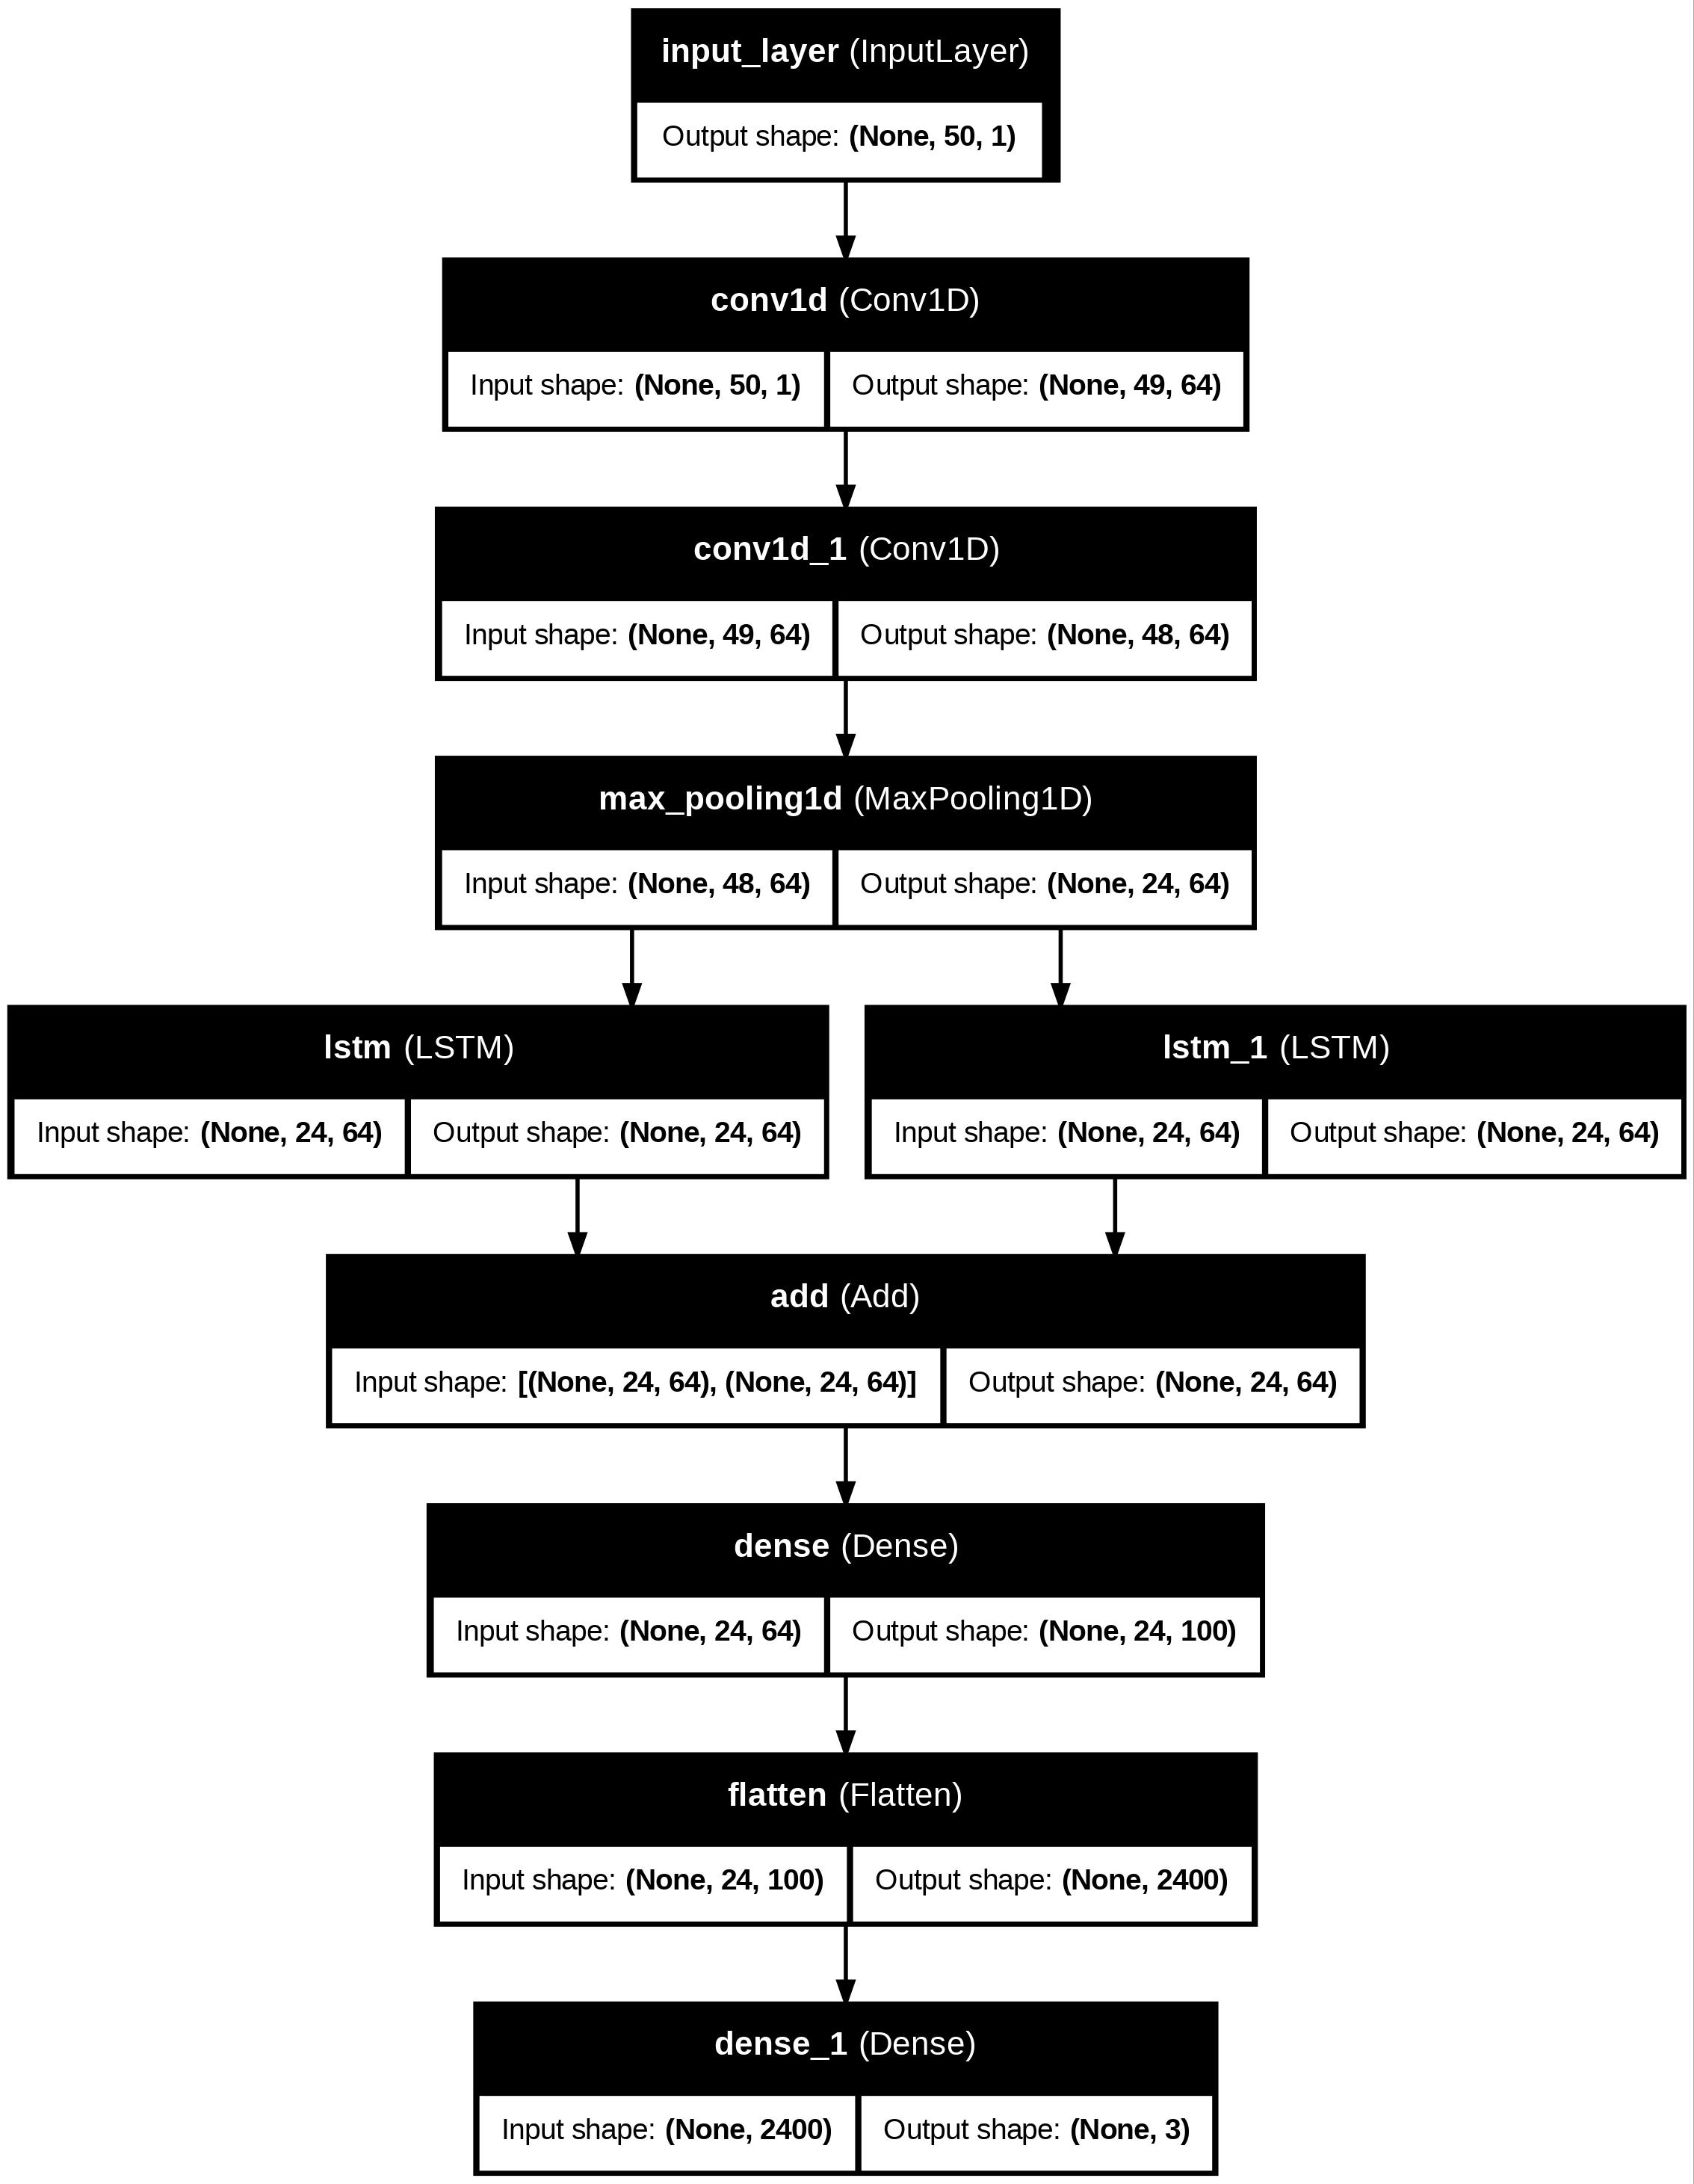

In [86]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model_architecture.jpg',show_shapes=True,show_layer_names=True)

In [87]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 50, 1)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 49, 64)         │            192 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 48, 64)         │          8,256 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 24, 64)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 24, 64)         │         33,024 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 24, 64)         │         33,024 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 24, 64)         │              0 │ lstm[0][0],            │
│                           │                        │                │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 24, 100)        │          6,500 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 2400)           │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 3)              │          7,203 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 88,199 (344.53 KB)

 Trainable params: 88,199 (344.53 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [89]:
# Define the ModelCheckpoint callback
checkpoint_filepath = 'merge_model.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Save the model with the highest validation accuracy
)

In [90]:
# Train your model with the ModelCheckpoint callback
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=100, #Adjust the number of epochs as needed
    validation_data=(x_test, y_test),  # Validation data
    callbacks=[model_checkpoint_callback]  # Include the callback
)

Epoch 1/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6318 - loss: 0.7045

342/342 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.6319 - loss: 0.7043 - val_accuracy: 0.7188 - val_loss: 0.5734
Epoch 2/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.7141 - loss: 0.5643 - val_accuracy: 0.7100 - val_loss: 0.5625
Epoch 3/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7157 - loss: 0.5542

342/342 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.7157 - loss: 0.5542 - val_accuracy: 0.7451 - val_loss: 0.5203
Epoch 4/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.7383 - loss: 0.5205 - val_accuracy: 0.7437 - val_loss: 0.5025
Epoch 5/100
341/342 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7496 - loss: 0.5023

342/342 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.7496 - loss: 0.5023 - val_accuracy: 0.7605 - val_loss: 0.5090
Epoch 6/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7633 - loss: 0.4864

342/342 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7633 - loss: 0.4864 - val_accuracy: 0.7837 - val_loss: 0.4693
Epoch 7/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.7767 - loss: 0.4761 - val_accuracy: 0.7353 - val_loss: 0.5172
Epoch 8/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.7583 - loss: 0.4854 - val_accuracy: 0.7609 - val_loss: 0.4807
Epoch 9/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.7746 - loss: 0.4684 - val_accuracy: 0.7774 - val_loss: 0.4643
Epoch 10/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.7814 - loss: 0.4676 - val_accuracy: 0.7837 - val_loss: 0.4533
Epoch 11/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.7809 - loss: 0.4549 - val_accuracy: 0.7757 - val_loss: 0.4746
Epoch 12/100
341/342 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7890 - loss: 0.4603

342/342 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.7890 - loss: 0.4603 - val_accuracy: 0.7986 - val_loss: 0.4465
Epoch 13/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.7882 - loss: 0.4503 - val_accuracy: 0.7985 - val_loss: 0.4380
Epoch 14/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7947 - loss: 0.4475 - val_accuracy: 0.7895 - val_loss: 0.4580
Epoch 15/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.7983 - loss: 0.4428 - val_accuracy: 0.7946 - val_loss: 0.4525
Epoch 16/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.7999 - loss: 0.4397 - val_accuracy: 0.7972 - val_loss: 0.4380
Epoch 17/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8059 - loss: 0.4329 - val_accuracy: 0.7986 - val_loss: 0.4482
Epoch 18/100
341/342 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7998 - loss: 0.4403

342/342 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.7998 - loss: 0.4403 - val_accuracy: 0.8080 - val_loss: 0.4308
Epoch 19/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.7986 - loss: 0.4345 - val_accuracy: 0.7865 - val_loss: 0.4454
Epoch 20/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.8051 - loss: 0.4298 - val_accuracy: 0.7936 - val_loss: 0.4514
Epoch 21/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.8081 - loss: 0.4271 - val_accuracy: 0.7913 - val_loss: 0.4397
Epoch 22/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8091 - loss: 0.4192 - val_accuracy: 0.8025 - val_loss: 0.4366
Epoch 23/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.8070 - loss: 0.4245 - val_accuracy: 0.8033 - val_loss: 0.4385
Epoch 24/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8070 - loss: 0.4297 - val_accuracy: 0.8067 - val_loss: 0.4358
Epoch 25/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.8074 - loss: 0.4288

342/342 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8065 - loss: 0.4204 - val_accuracy: 0.8120 - val_loss: 0.4281
Epoch 28/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8146 - loss: 0.4153 - val_accuracy: 0.7973 - val_loss: 0.4404
Epoch 29/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8074 - loss: 0.4228 - val_accuracy: 0.8057 - val_loss: 0.4287
Epoch 30/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.8139 - loss: 0.4089 - val_accuracy: 0.8098 - val_loss: 0.4316
Epoch 31/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8112 - loss: 0.4215

342/342 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8112 - loss: 0.4214 - val_accuracy: 0.8135 - val_loss: 0.4289
Epoch 32/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.8161 - loss: 0.4087 - val_accuracy: 0.7961 - val_loss: 0.4554
Epoch 33/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.8022 - loss: 0.4271 - val_accuracy: 0.8042 - val_loss: 0.4326
Epoch 34/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.8235 - loss: 0.3958 - val_accuracy: 0.7975 - val_loss: 0.4524
Epoch 35/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8133 - loss: 0.4135 - val_accuracy: 0.7943 - val_loss: 0.4481
Epoch 36/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8143 - loss: 0.4165 - val_accuracy: 0.8036 - val_loss: 0.4368
Epoch 37/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.8119 - loss: 0.4158 - val_accuracy: 0.8018 - val_loss: 0.4404
Epoch 38/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8213 - loss: 0.4029

In [91]:
np.argmax(model.predict(x_test[:100]),axis=-1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


array([1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1,
       0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0])

In [92]:
model.evaluate(x_test,y_test)

293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7461 - loss: 0.6580


[0.6708939671516418, 0.7419458031654358]

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(100, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Save the model directly in Colab's session
model.save('lstm_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(100, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Save the model in Colab
model.save('lstm_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [97]:
y_pred_classes = model.predict(x_test)
y_pred  = np.argmax(y_pred_classes,axis=1)

293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [98]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
y_true = np.argmax(y_test,axis=1)

In [100]:
from sklearn.metrics import classification_report, f1_score,precision_score,recall_score,accuracy_score
import seaborn as sns

# calculate the F1-score, precision, and recall
f1score = f1_score(y_true, y_pred,average='weighted')
precision = precision_score(y_true, y_pred,average='weighted')
recall = recall_score(y_true, y_pred,average='weighted')
accuracy = accuracy_score(y_true,y_pred)

In [101]:
print('F1-score: {:.3f}'.format(f1score))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('Accuracy: {:.3f}'.format(accuracy))

F1-score: 0.167
Precision: 0.111
Recall: 0.333
Accuracy: 0.333


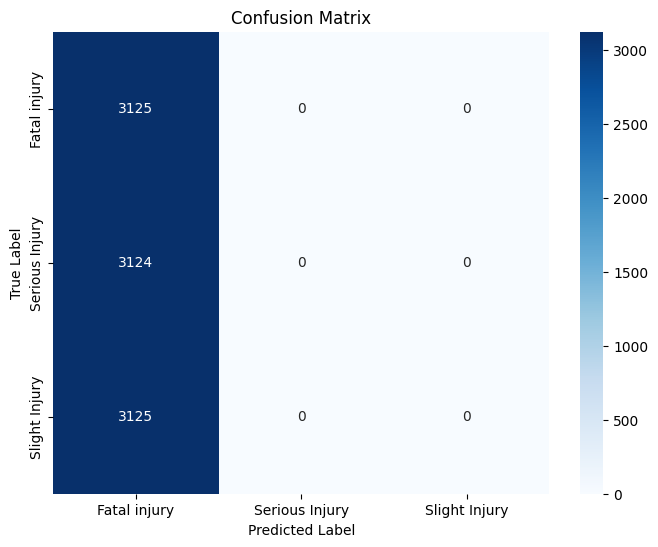

In [102]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, cmap="Blues", annot=True, fmt="d", xticklabels=['Fatal injury','Serious Injury','Slight Injury'],
            yticklabels=['Fatal injury','Serious Injury','Slight Injury'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig('confusion_matrix.png')
plt.show()

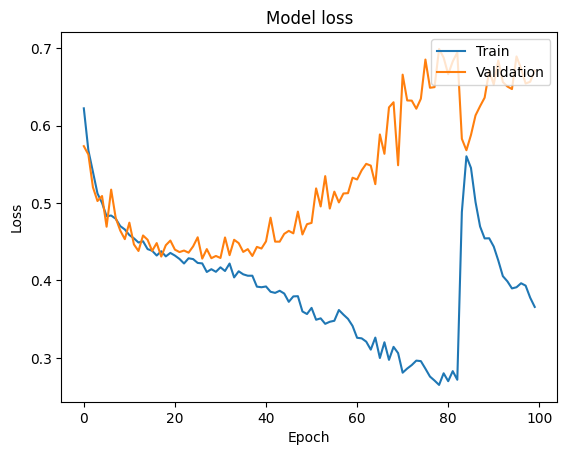

In [103]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('loss.png')
plt.show()

In [104]:
y_pred_roc = tf.keras.utils.to_categorical(y_pred, 3)

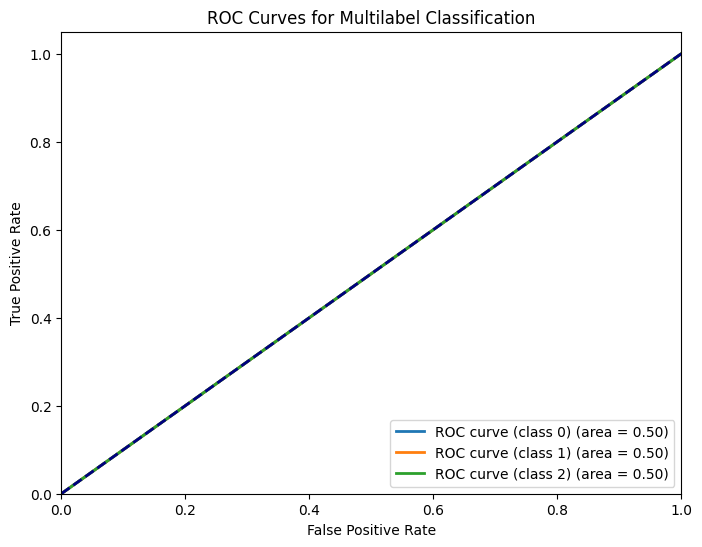

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_roc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(y_test[0])):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multilabel Classification')
plt.legend(loc='lower right')
plt.savefig('roc_auc.png')
plt.show()